<a href="https://colab.research.google.com/github/bvchand/Diabetes-detection-in-ICU-patients/blob/main/diabetes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd '/content/drive/MyDrive/Spring-2021/CMPE-255/CMPE-255_Project/widsdatathon2021'

/content/drive/MyDrive/Spring-2021/CMPE-255/CMPE-255_Project/widsdatathon2021


In [7]:
data_dict = pd.read_csv("DataDictionaryWiDS2021.csv")

In [8]:
data_dict

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,demographic,age,Years,numeric,The age of the patient on unit admission,None
3,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admi...,21.5
4,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospit...,0
...,...,...,...,...,...,...
176,APACHE comorbidity,immunosuppression,None,binary,Whether the patient has their immune system su...,1
177,APACHE comorbidity,leukemia,None,binary,Whether the patient has been diagnosed with ac...,1
178,APACHE comorbidity,lymphoma,None,binary,Whether the patient has been diagnosed with no...,1
179,APACHE comorbidity,solid_tumor_with_metastasis,None,binary,Whether the patient has been diagnosed with an...,1


In [9]:
diabetes_train = pd.read_csv("TrainingWiDS2021.csv")

In [10]:
diabetes_train

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.450,33.0,...,11.3,11.3,36.9,36.9,1.30,1.30,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.450,7.450,51.0,51.0,54.8,51.000000,37.0,37.0,7.450,7.450,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.390,4.0,...,11.6,11.6,34.0,34.0,1.60,1.10,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.440,7.340,337.0,102.0,342.5,236.666667,36.0,33.0,7.370,7.340,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,1109,admit,Cardiac ICU,0.023611,0,90.0,NaN,110.0,104.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,106.0,NaN,0,120.0,NaN,NaN,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
130153,130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,Accident & Emergency,1106,admit,MICU,0.009722,0,78.4,3.5,105.0,207.01,0,0,0.7,32.0,1.07,NaN,4.0,6.0,0.0,

In [12]:
diabetes_train.ethnicity.unique()

array(['Caucasian', nan, 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

In [13]:
diabetes_train.age.describe()

count    125169.000000
mean         61.995103
std          16.822880
min           0.000000
25%          52.000000
50%          64.000000
75%          75.000000
max          89.000000
Name: age, dtype: float64

## Deepa Experimental Code


In [14]:
diabetes_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,130157.0,65079.000000,37573.233831,1.000000,32540.000000,65079.000000,97618.000000,130157.00000
encounter_id,130157.0,213000.856519,38109.828146,147000.000000,180001.000000,213014.000000,246002.000000,279000.00000
hospital_id,130157.0,106.102131,63.482277,1.000000,49.000000,112.000000,165.000000,204.00000
age,125169.0,61.995103,16.822880,0.000000,52.000000,64.000000,75.000000,89.00000
bmi,125667.0,29.110260,8.262776,14.844926,23.598006,27.564749,32.803127,67.81499
...,...,...,...,...,...,...,...,...
immunosuppression,130157.0,0.025669,0.158146,0.000000,0.000000,0.000000,0.000000,1.00000
leukemia,130157.0,0.007307,0.085166,0.000000,0.000000,0.000000,0.000000,1.00000
lymphoma,130157.0,0.004187,0.064574,0.000000,0.000000,0.000000,0.000000,1.00000
solid_tumor_with_metastasis,130157.0,0.020852,0.142888,0.000000,0.000000,0.000000,0.000000,1.00000


In [ ]:
# look at missing values
missing_count=diabetes_train.isnull().sum()
missing_df = (pd.concat([missing_count,missing_count.div(len(diabetes_train))
                          .rename('Missing percent')],axis = 1)
             .loc[missing_count.ne(0)])
missing_df

#So there are quite a few missing values, use one of the strategies to fix

In [16]:
#load the test df
diabetes_test = pd.read_csv("UnlabeledWiDS2021.csv")
diabetes_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10234.0,5117.500000,2954.445661,1.0,2559.25,5117.5,7675.75,10234.000
encounter_id,10234.0,140498.779461,3182.455522,135000.0,137742.25,140503.5,143252.75,146000.000
hospital_id,10234.0,10092.391929,57.008062,10001.0,10043.00,10085.0,10145.00,10199.000
age,10234.0,62.853625,17.851661,18.0,52.00,65.0,76.00,96.000
bmi,9219.0,29.116463,8.342873,14.9,23.70,27.6,32.60,69.944
...,...,...,...,...,...,...,...,...
hepatic_failure,10234.0,0.010064,0.099821,0.0,0.00,0.0,0.00,1.000
immunosuppression,10234.0,0.022572,0.148541,0.0,0.00,0.0,0.00,1.000
leukemia,10234.0,0.006547,0.080651,0.0,0.00,0.0,0.00,1.000
lymphoma,10234.0,0.004104,0.063934,0.0,0.00,0.0,0.00,1.000


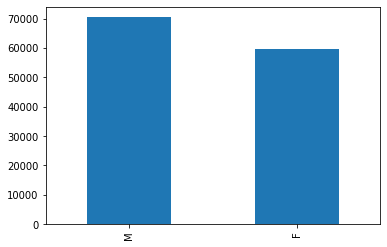

In [17]:
# drop the unnamed:0 column 
if 'Unnamed: 0' in diabetes_test.columns:
  diabetes_test = diabetes_test.drop(columns=['Unnamed: 0'])
if 'Unnamed: 0' in diabetes_train.columns:
  diabetes_test = diabetes_train.drop(columns=['Unnamed: 0'])

# look at gender distribution
gender = diabetes_train["gender"].value_counts()
gender.plot(kind="bar")

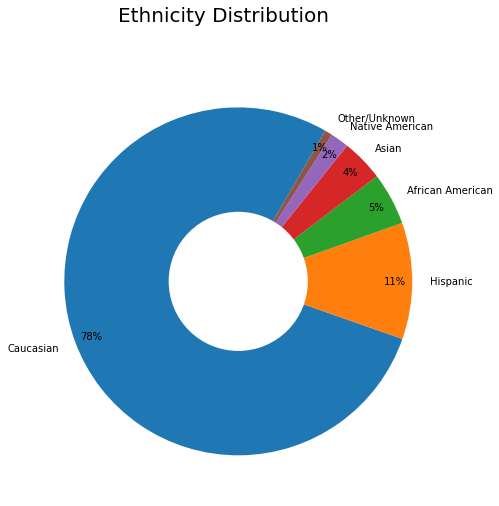

In [26]:
# look at ethnicity distribution
#diabetes_train['ethnicity'].unique() #to get values for labels
labels = ['Caucasian', 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown']
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Ethnicity Distribution', size = 20)
sizes = diabetes_train["ethnicity"].value_counts()
ax.pie(sizes, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()


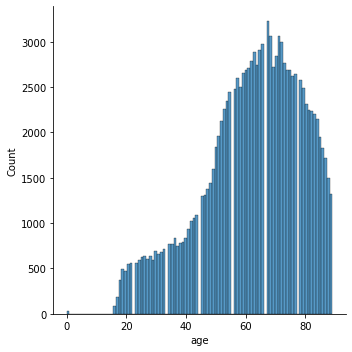

In [27]:
# look at age distribution
ax = sns.displot(diabetes_train['age']);
# looks like we have some counts against age=0
#most of the patients lie in the 60-80 age range